In [385]:
import numpy as np
import randrot as rd
import copy
import sys
sys.path.insert(0, '../')
from original import Kernels as K
import matplotlib.pyplot as plt

In [402]:
k3 = K.ThreeBody(theta=[1., 1000., 100000.])

Started compilation of theano three body kernels
Ended compilation of theano three body kernels


In [403]:
# define a function taking the positions 
# of thre atoms and creating a local configuration around the first 

def build_conf(r1, r2, r3):
    r1, r2, r3 = np.array(r1, dtype = float), np.array(r2, dtype = float), np.array(r3, dtype = float)
    riv = r2[0:3]-r1[0:3]
    rjv = r3[0:3]-r1[0:3]

    ri = np.concatenate((riv, np.array([r1[3], r2[3]])))
    rj = np.concatenate((rjv, np.array([r1[3], r3[3]])))
    conf = np.reshape(np.array([[ri],[rj]]),(1, 2, 5))
    return conf
     

In [404]:
# test that three body works correctly
s1 = 1.
s2 = 2.
s3 = 3.

In [405]:
# Define thee atoms, arbitrarily positioned

r1 = [0, 0, 0, s1]
r2 = [3, 0, 0, s2]
r3 = [0, 4, 0, s3]

c1 = build_conf(r1, r2, r3)
c1

array([[[3., 0., 0., 1., 2.],
        [0., 4., 0., 1., 3.]]])

In [406]:
k3.calc_ee(c1, c1)

array([[3.70729732]])

In [407]:
base_kernels = []

for i in np.arange(10000):
    r2r = np.concatenate((np.random.normal(0, 1, (3,)),[1,1]))
    r3r = np.concatenate((np.random.normal(0, 1, (3,)), [1,1]))
    c_ran = build_conf(r1, r2, r3)
    base_kernels.append(k3.calc_ee(c_ran, c_ran)[0,0])

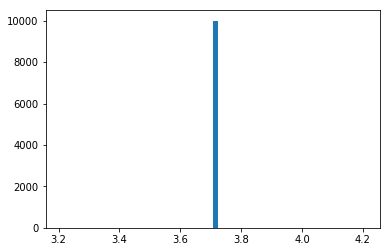

In [408]:
plt.hist(base_kernels, 60)
plt.show()

### Permutations

In [409]:
rs = [r1, r2, r3]

In [410]:
rs

[[0, 0, 0, 1.0], [3, 0, 0, 2.0], [0, 4, 0, 3.0]]

In [411]:
np.random.permutation(rs)

array([[0., 4., 0., 3.],
       [3., 0., 0., 2.],
       [0., 0., 0., 1.]])

In [412]:
permuted_kernels = []

for i in np.arange(10):
    
    rs_per = np.random.permutation(rs)

    c_per = build_conf(rs_per[0], rs_per[1], rs_per[2])
    
    permuted_kernels.append(k3.calc_ee(c_per, c_per)[0,0])

In [413]:
permuted_kernels

[3.707297315934694,
 3.707297315934693,
 3.707297315934693,
 3.707297315934693,
 3.707297315934693,
 3.707297315934693,
 3.707297315934693,
 3.707297315934693,
 3.707297315934694,
 3.707297315934694]

### Rotations

In [414]:
rotated_kernels = []

for i in np.arange(10):
    RM = rd.generate(3)
    r1r, r2r, r3r = np.array(r1[:]), np.array(r2[:]), np.array(r3[:])
    r1r[0:3], r2r[0:3], r3r[0:3] = np.array(RM.dot(r1[0:3])), np.array(RM.dot(r2[0:3])), np.array(RM.dot(r3[0:3]))
    c_rot = build_conf(r1r, r2r, r3r)
    
    rotated_kernels.append(k3.calc_ee(c_rot, c_rot)[0,0])

In [415]:
rotated_kernels

[3.707297315934695,
 3.7072973159346945,
 3.7072973159346923,
 3.7072973159346923,
 3.707297315934693,
 3.7072973159346887,
 3.7072973159346923,
 3.707297315934693,
 3.7072973159346923,
 3.707297315934693]